# Take-Home Exam 1: NYC Bike Rentals - Data Exploration

In this take-home exam, you are going to investigate bike rentals that took place in NYC. Most of the tasks involve the libraries that you have experienced, such as pandas and matplotlib. In addition, you are going to use `folium` as well, in order to plot spatial distributions.

**Submission Instructions**

---
Copy this assignment to you Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th1`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on your SUCourse submission.


For any question, you may send an email to the TAs and LAs.

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

%matplotlib inline

In [ ]:
fname = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, fname))

df.head()

FileNotFoundError: ignored

## Data Pre-Processing

#### Datetime Conversion

In the dataframe, the `starttime`, `stoptime` columns are object data types. Convert them to datetime objects as you did in the recitations.

In [ ]:
df["starttime"] = pd.to_datetime(df["starttime"])
df["stoptime"] = pd.to_datetime(df["stoptime"])


#### Dealing with NaN values

##### Check NaN Distributions

Show the percentage of NaN values in each column.

*hint: You may check recitation materials.*

In [ ]:
print(1-df.count()/len(df))

starttime                  0.000000
stoptime                   0.000000
start station id           0.000000
start station name         0.000000
start station latitude     0.000000
start station longitude    0.000000
end station id             0.000000
end station name           0.000000
end station latitude       0.000000
end station longitude      0.000000
bikeid                     0.000000
usertype                   0.000000
birth year                 0.107587
gender                     0.000000
dtype: float64


##### Dropping NaNs

In the following tasks, you will work on age distribution and grouppings. As a result, you need to get rid of NaN age values.

Drop NaN values from the dataframe.


In [ ]:
df=df.dropna()

#### Distance Calculation

Create a new column named `distance` by calculating the distance between starting and ending locations of the bike rents.

You may utilize any library you wish. But we encourage you to use [Geopy](https://pypi.org/project/geopy/) library and its distance functionality.

Please check out the usage of the library from the url provided if you decided to use Geopy.

In [ ]:
df["distancelat"] = df['start station latitude'] - df['end station latitude']
df["distancelong"] = df['start station longitude'] - df['end station longitude']

from geopy import Point
from geopy.distance import distance
df['point1'] = df.apply(lambda row: Point(latitude=row['start station latitude'], longitude=row['start station longitude']), axis=1)
df['point2'] = df.apply(lambda row: Point(latitude=row['end station latitude'], longitude=row['end station longitude']), axis=1)
df['distance_miles'] = df.apply(lambda row: distance(row['point1'], row['point2']).miles if row['point2'] is not None else float('nan'), axis=1)
print(df.head())


            starttime  ... distance_miles
0 2016-05-31 19:58:48  ...       0.410832
2 2016-05-09 07:31:19  ...       0.847329
3 2016-04-17 18:08:30  ...       0.290561
4 2016-05-24 21:10:12  ...       0.723684
5 2016-01-19 21:44:44  ...       0.183102

[5 rows x 19 columns]


#### Age Distribution

As you may have checked, the age of people who uses bikes in the NYC varies a lot. To analyze this observation further, we can categorize the age of people using bikes. However, before doing that it is a good idea to check the age distribution first.

**Now, please perform following tasks.**

1. **Create a function to be applied on the dataframe to extract the age information from given `birth year` column. Then, create a new column called `age` with the information extracted.**
2. **Check age distribution (of column `age`) in a histogram.**
3. **Create your own age categories after observing the age distributions.**
4. **Express your rationale on your age category selection with markdown writing (and please use available formatting options).**

An example category list is given below.

*An example age category list:*
  - *Between 0 and 14 ages, child*
  - *Between 15 and 24 ages, young* 
  - *Between 25 and 64 ages, adult*
  - *For people who are 65+, senior*

a 74
b 20928
c 49902
d 4367
FOR GENERAL DATAFRAME
FOR AGES UNDER 22
FOR AGES UNDER 35 
FOR AGES UNDER 64 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a66c5b438>,
      dtype=object)

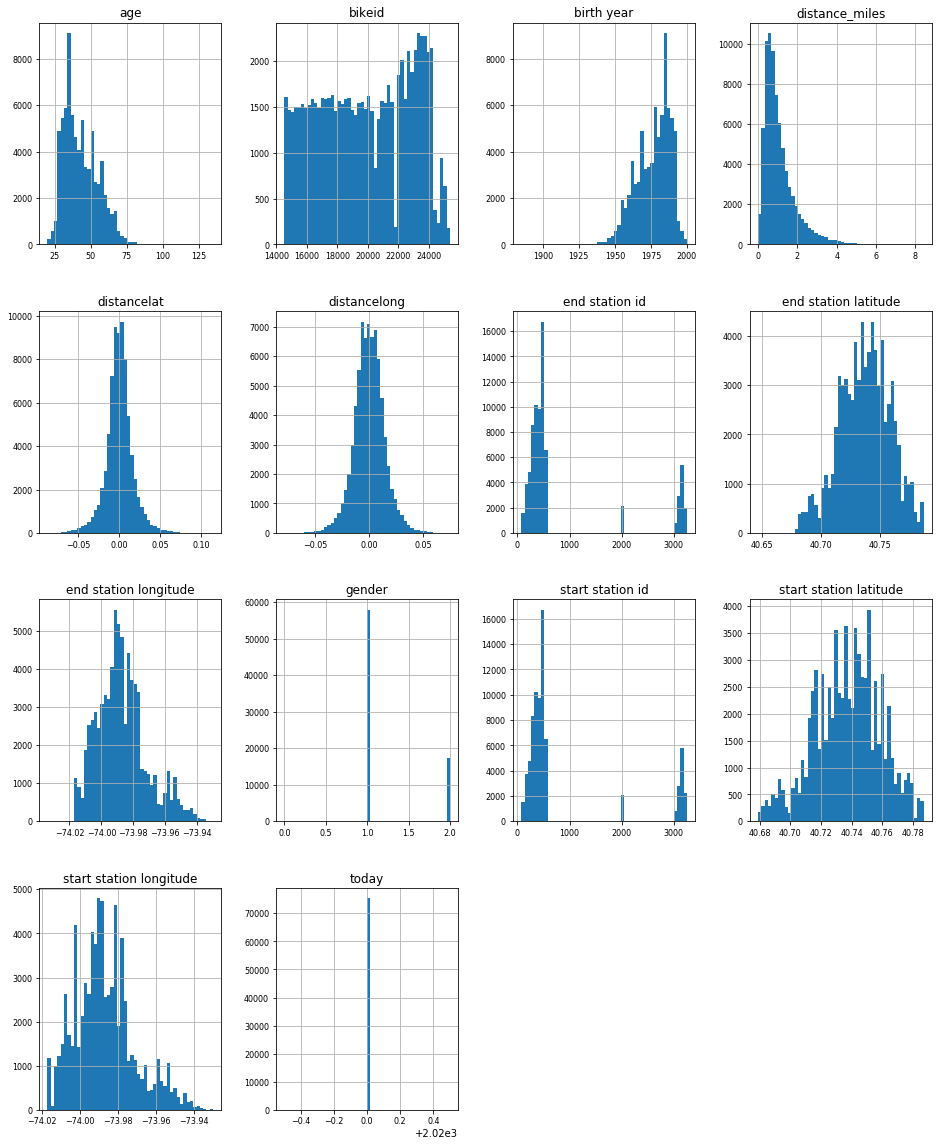

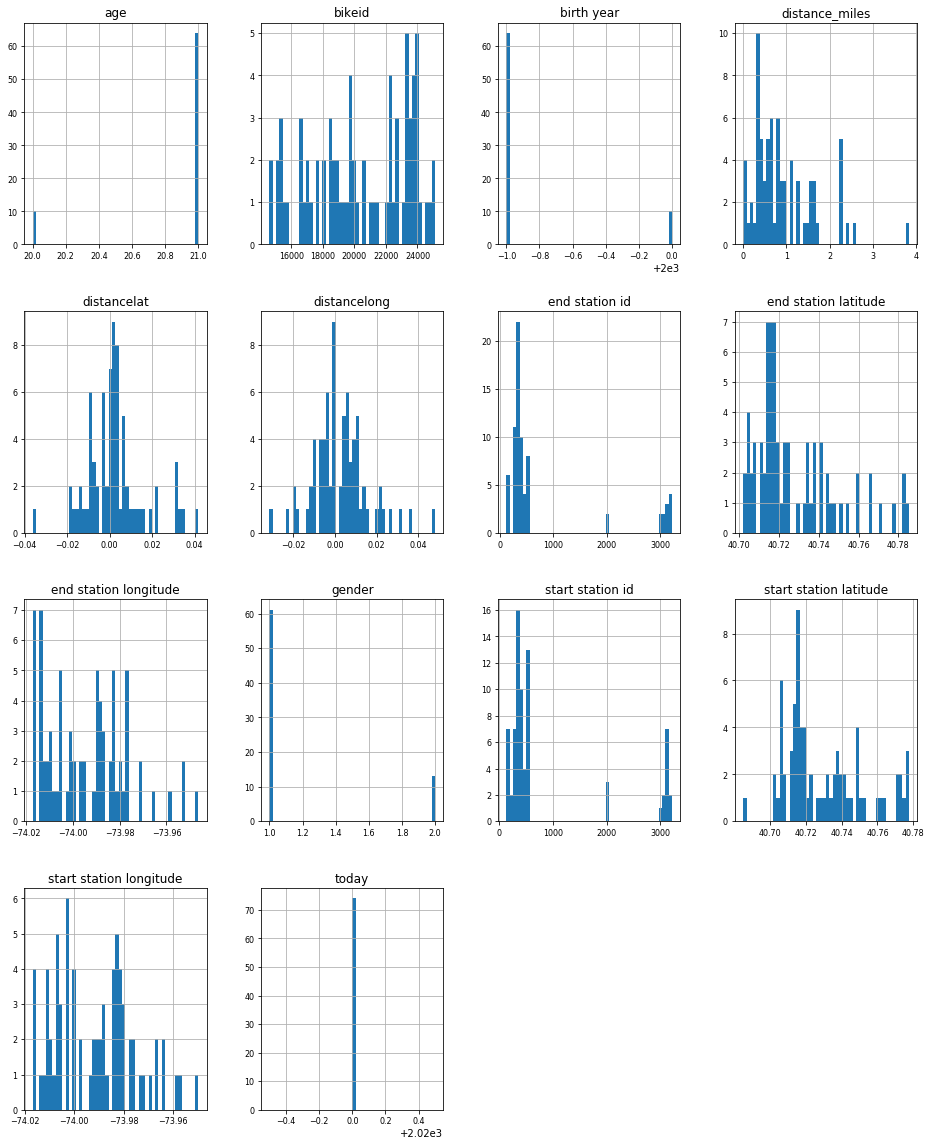

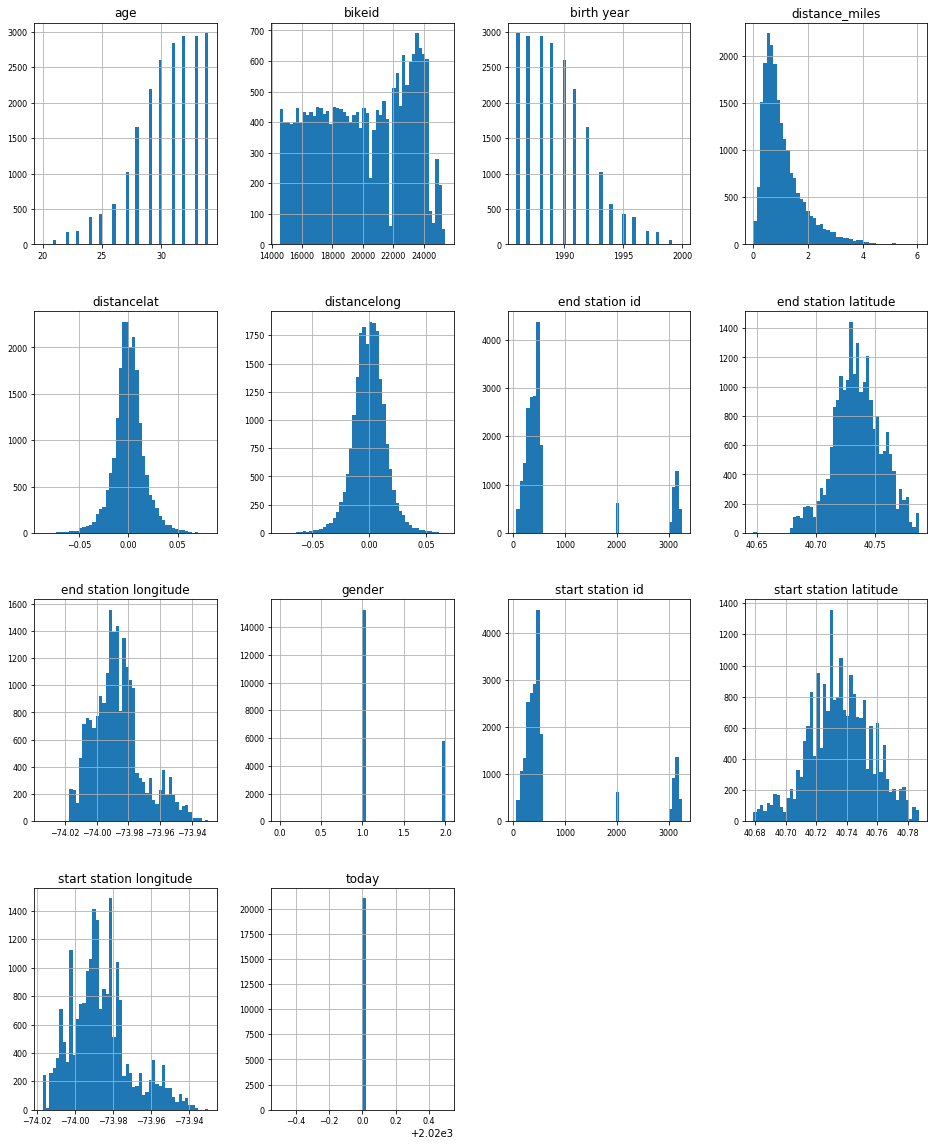

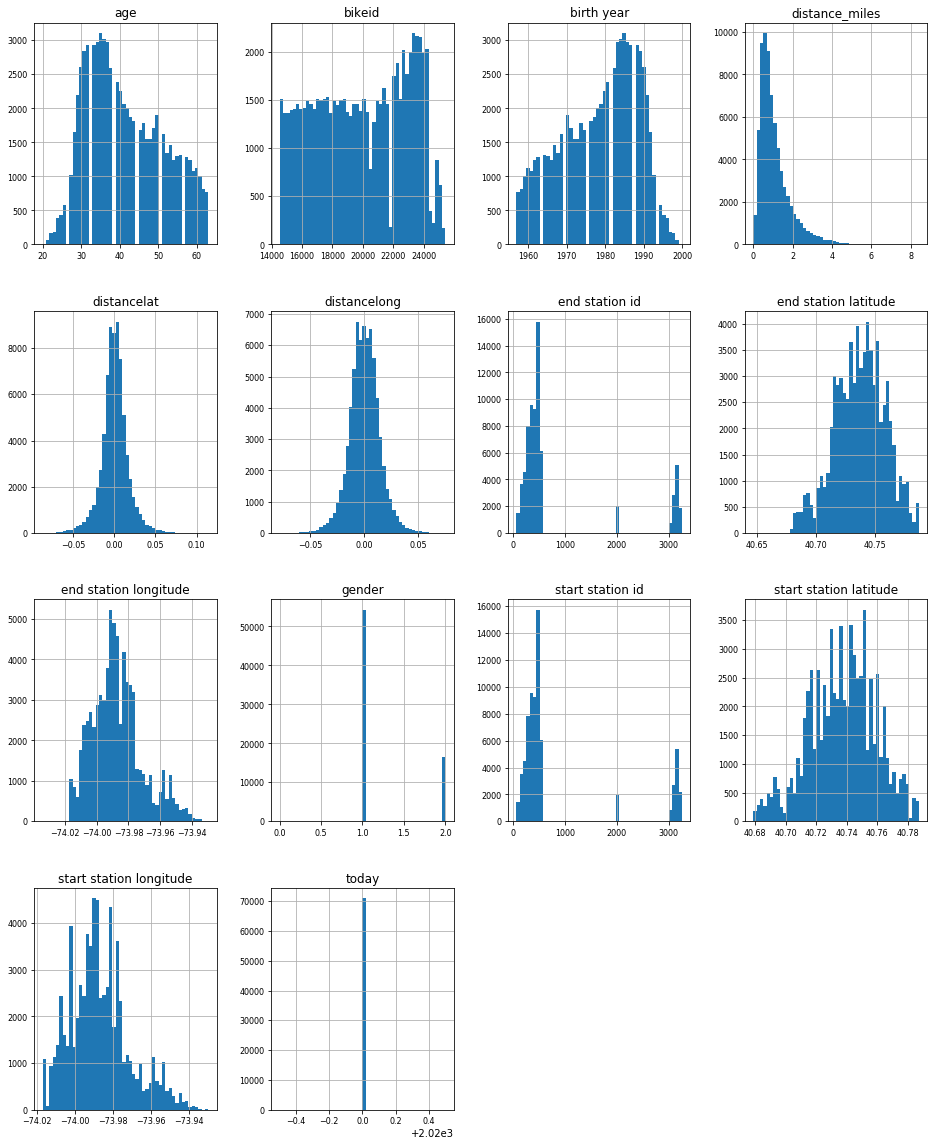

In [ ]:
# question below i used bins in here it is more different
df["today"] = 2020
df["age"] = df["today"] - df["birth year"]
df["age"].head()
df1 = df[df['age'] < 22] # they cant drive car in usa under 21 
df2 = df[df['age'] < 35] # probably uses car or any otherthing except bicycle
df3 = df[df['age'] < 64] # 
df4 = df[df['age'] < 100] # lets see if we can see some more old people
a = len(df1['age'])
b = len(df2['age']) - len(df1['age'])
c = len(df3['age']) - len(df2['age']) 
d = len(df4['age']) - len(df3['age'])
print("a",a)
print("b",b)
print("c",c)
print("d",d)
print("FOR GENERAL DATAFRAME")
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
print("FOR AGES UNDER 22")
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
print("FOR AGES UNDER 35 ")
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
print("FOR AGES UNDER 64 ")
df3.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#### Age Groups


In order to categorize bike users in terms of their ages, create a function for age categorization called `age_categorize` by referring to the categories and their corresponding age intervals that you explained and justified above. Then, **apply** this function to create a new column in the dataframe called `age_category`.

In [ ]:
 # it is 6 bins here i also wanted to see people over 100 years if there is any
def age_categorize():
  bins = [0, 22, 35, 64, 100, np.inf]
  names = ['<22', '22-35', '35-64', '64-100', '100+']
  df['age_category'] = pd.cut(df['age'], bins, labels=names)
age_categorize()
df['age_category']


0        22-35
2        22-35
3        22-35
4        35-64
5        35-64
         ...  
84373    35-64
84374    35-64
84375    22-35
84376    35-64
84377    22-35
Name: age_category, Length: 75300, dtype: category
Categories (5, object): [<22 < 22-35 < 35-64 < 64-100 < 100+]

## Extracting Insights

#### Distance Distributions

With a histogram, plot the distribution of the `distance` column that you added to the dataframe in the earlier steps.


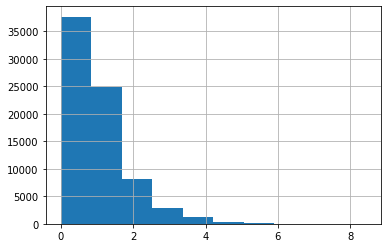

In [ ]:
df['distance_miles'].hist()

#### Observation Regarding Distances

Does something seem odd? Some of the distances between start and end points seem to be 0. This should be the cases where people leaving the bikes to the same station where they rent them. 

To make sure, 
1. Please find those cases by showing the total counts of rows where the starting and ending stations are same.
2. Plot those cases against rentals do not start and end in same stations in a bar chart.

*(You can also utilize the id of these bike rental stations.)*

total number of cases where start and ending is the same location:  902
total number of cases where start and ending is NOT the same location:  74398


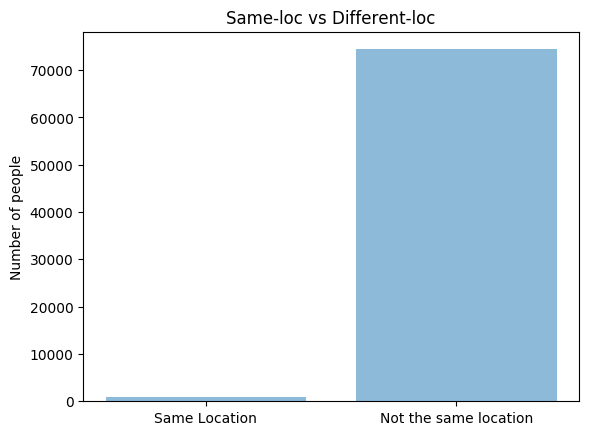

In [ ]:
import matplotlib.pyplot as plt
df5 = df[df['distance_miles'] == 0]
df6 = df[df['distance_miles'] != 0]
print("total number of cases where start and ending is the same location: ",len(df5))
print("total number of cases where start and ending is NOT the same location: ",len(df6))
import matplotlib.pyplot as plt; plt.rcdefaults()



objects = ('Same Location', 'Not the same location')
y_pos = np.arange(len(objects))
numberoftimes = [len(df5),len(df6)]

plt.bar(y_pos, numberoftimes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('Same-loc vs Different-loc')

plt.show()


#### Rentals in Weekdays vs. Weekends

Since we have the date information for the bike rentals, by utilizing the functionality of the `datetime` library we can obtain the day information from the `starttime` and `stoptime`.

Now, your tasks are following:
  
  - Extract the day of week (Monday, Tuesday, etc.) information from `starttime` column and create a new column in the dataframe called `day`
  - Using this column, create a new column called `time_of_week`, which shows if the `day` value is in weekdays are in weekend days.
  - Create another column named `hour` by extracting the hour attribute from start time. 
  - Then, with these columns, show the average bike rental amounts per hour for weekdays and weekends in a 2x1 figure layout with line charts.

Please check the documentation of the [date objects](https://docs.python.org/3/library/datetime.html#datetime.date) in the datetime library from the link provided.

In [ ]:
from datetime import datetime, date
df["starttime"] = pd.to_datetime(df["starttime"])
df['starttime'] = pd.date_range(df['starttime'][0], df['starttime'][len(starttime)], freq='D').to_series()
df['starttime'].dt.dayofweek


NameError: ignored

#### Age Distributions by Gender

In our original data, gender information was mapped as follows:

    - 0: unknown
    - 1: male
    - 2: female

Use this information to display the age distributions of male and female bike users in different graphs. To do that, please use **matplotlib**'s `subplots` option to create 2 graphs located in the same row.

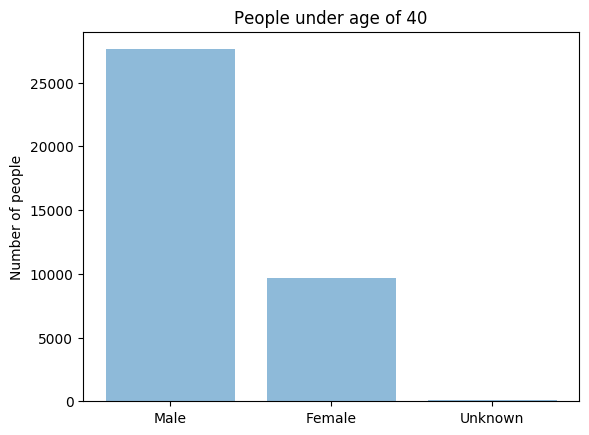

Text(0.5, 1.0, 'People above age of 40')

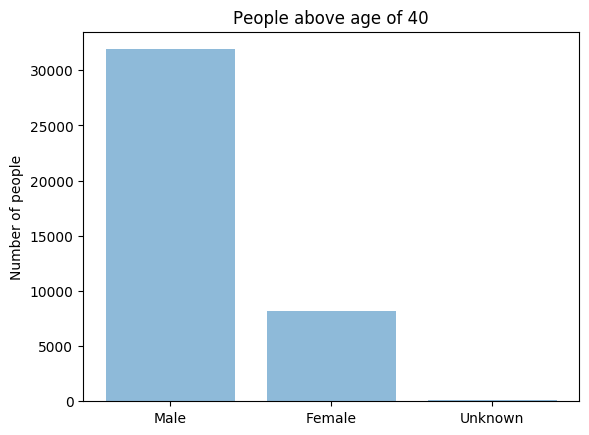

In [ ]:
import matplotlib.pyplot as plt
df10 = df[df['age'] <= 40]
df11 = df10[df10['gender'] == 0]
df12 = df10[df10['gender'] == 1]
df13 = df10[df10['gender'] == 2]

df14 = df[df['age'] >= 40]
df15 = df14[df14['gender'] == 0]
df16 = df14[df14['gender'] == 1]
df17 = df14[df14['gender'] == 2]

import matplotlib.pyplot as plt; plt.rcdefaults()



objects = ('Male', 'Female', 'Unknown')
y_pos = np.arange(len(objects))
numberoftimes = [len(df12),len(df13),len(df11)]
numberoftimes2 = [len(df16),len(df17),len(df15)]

plt.bar(y_pos, numberoftimes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('People under age of 40')

plt.show()
# beceremedim... ugrastim:( puan kirmazsaniz cok makbule gecer varya :)
plt.bar(y_pos, numberoftimes2, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('People above age of 40')

#### Usage by Age Groups

Write a function that will display the usage of bike rental system by different age groups in a bar chart *for a given time interval*. For this taks, the first step is provided for you, please complete the implementation of the function named `age_groups_in_time_intervals`. The function will take two datetime parameters for `starttime` values and will show age group ratios in pie chart.

In [ ]:
def age_groups_in_time_interval(time1,time2):
  dg = df.copy()
  dg = df[df['starttime']>=datetime(time1)]
  dg = df[df['starttime'] <=datetime(time2)]
age_groups_in_time_interval(2017-12-11,2019-10-11)

TypeError: ignored

#### Age Groups vs Distance 

Similar to the task above, we can also investigate the variance of distance between age groups. Plot histograms of distances in each age group in a juxtaposed 1x3 layout.

In [ ]:
df

## Spatial Visualizations

In this section, you are going to utilize the latitude and longitude values associated with bike rentals and visualize them on a real-world map. 

#### Bike Stations in NYC

From all locations (latitude, longitude pairs) in start and end stations, extract the unique ones and display them as circle markers on the map.

In [ ]:
import folium
# people who started traveling and arrived the same location and their age catalogs
colors = {'<22' : 'white','22-35' : 'red', '35-64' : 'blue', '64-100': 'green','100+' : 'black'}

map_nyc = folium.Map(location=[40.742, -73.956], zoom_start=11)
dfzero =df[df['distance_miles'] == 0]
dfzero.apply(lambda row:folium.CircleMarker(location=[row["start station latitude"], row["start station longitude"]], 
                                              radius=10, fill_color=colors[row['age_category']])
                                             .add_to(map_nyc), axis=1)

map_nyc

In [ ]:
df.tail()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,distancelat,distancelong,point1,point2,distance_miles,today,age,age_category,time_of_week,starttime2,Timestamp
84373,2016-03-17 18:10:01,2016-03-17 18:21:10,462,W 22 St & 10 Ave,40.746920,-74.004519,238,Bank St & Washington St,40.736197,-74.008592,23643,Subscriber,1981.0,1,0.010723,0.004073,"40 44m 48.9105s N, 74 0m 16.2679s W","40 44m 10.3081s N, 74 0m 30.9315s W",0.770170,2020,39.0,35-64,2016-03-17 18:10:01,2016-03-17 18:10:01,2020-03-09 00:26:28.835513
84374,2016-01-08 12:46:03,2016-01-08 12:48:42,174,E 25 St & 1 Ave,40.738177,-73.977387,536,1 Ave & E 30 St,40.741444,-73.975361,22949,Subscriber,1981.0,1,-0.003267,-0.002026,"40 44m 17.4354s N, 73 58m 38.5918s W","40 44m 29.1979s N, 73 58m 31.299s W",0.249270,2020,39.0,35-64,2016-01-08 12:46:03,2016-01-08 12:46:03,2020-03-09 00:26:28.835513
84375,2016-05-02 16:08:22,2016-05-02 16:19:43,293,Lafayette St & E 8 St,40.730287,-73.990765,470,W 20 St & 8 Ave,40.743453,-74.000040,16251,Subscriber,1987.0,1,-0.013167,0.009276,"40 43m 49.032s N, 73 59m 26.7529s W","40 44m 36.4321s N, 74 0m 0.145116s W",1.030754,2020,33.0,22-35,2016-05-02 16:08:22,2016-05-02 16:08:22,2020-03-09 00:26:28.835513
84376,2016-01-06 17:02:06,2016-01-06 17:08:07,435,W 21 St & 6 Ave,40.741740,-73.994156,492,W 33 St & 7 Ave,40.750200,-73.990931,17342,Subscriber,1967.0,1,-0.008460,-0.003225,"40 44m 30.2629s N, 73 59m 38.96s W","40 45m 0.71982s N, 73 59m 27.3511s W",0.607815,2020,53.0,35-64,2016-01-06 17:02:06,2016-01-06 17:02:06,2020-03-09 00:26:28.835513
84377,2016-04-01 13:09:19,2016-04-01 13:26:31,127,Barrow St & Hudson St,40.731724,-74.006744,450,W 49 St & 8 Ave,40.762272,-73.987882,17489,Subscriber,1985.0,1,-0.030548,-0.018862,"40 43m 54.2074s N, 74 0m 24.2797s W","40 45m 44.1794s N, 73 59m 16.3754s W",2.328730,2020,35.0,22-35,2016-04-01 13:09:19,2016-04-01 13:09:19,2020-03-09 00:26:28.835513


#### Heatmap of Rentals

Extract the latitude and longitude values of rental start locations and display their heatmap. 

In order to generate a heatmap, you may use the link below.

https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap

In [ ]:
import folium
def generateBaseMap(default_location=[40.748900, -73.976048], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
base_map = generateBaseMap()
base_map

In [ ]:
from folium.plugins import HeatMap
df_copy = df[df.age > 30].copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['start station latitude', 'start station longitude', 'count']].groupby(['start station latitude', 'start station longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [ ]:
base_map

In [ ]:
df_copy = df.copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['start station latitude', 'start station longitude', 'count']].groupby(['start station latitude', 'start station longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [ ]:
base_map